In [1]:
44.15-33.33

10.82

In [1]:
from importlib import reload
import EEG_with_functions as f
reload(f)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from tqdm import tqdm

plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    'axes.xmargin': 0,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelsize': 14,
    "axes.titlesize": 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20,
    'grid.linewidth': 0.5
})

In [2]:
features = pd.read_csv("features_more.csv")
survey = f.import_survey_df()

In [5]:
metadata_columns = ['Respondent', 'Participant_ID', 'mean_rating', 'Participant_ID_short',
       'image_number', 'individual_ratings', 'ID', 'Type', "Missing",  "class"]

dropping_columns = metadata_columns 
# X1 = features.drop(dropping_columns, axis = 1)

# all_columns = set(X1.columns)
# columns_to_drop = set(_frontal + _central)
# columns_to_drop = columns_to_drop.intersection(all_columns)

X = features.drop(dropping_columns, axis = 1)
y = features["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
features["individual_ratings"].unique()

array([5., 6., 4., 3., 1., 2., 7.])

# Label distributie van alle data

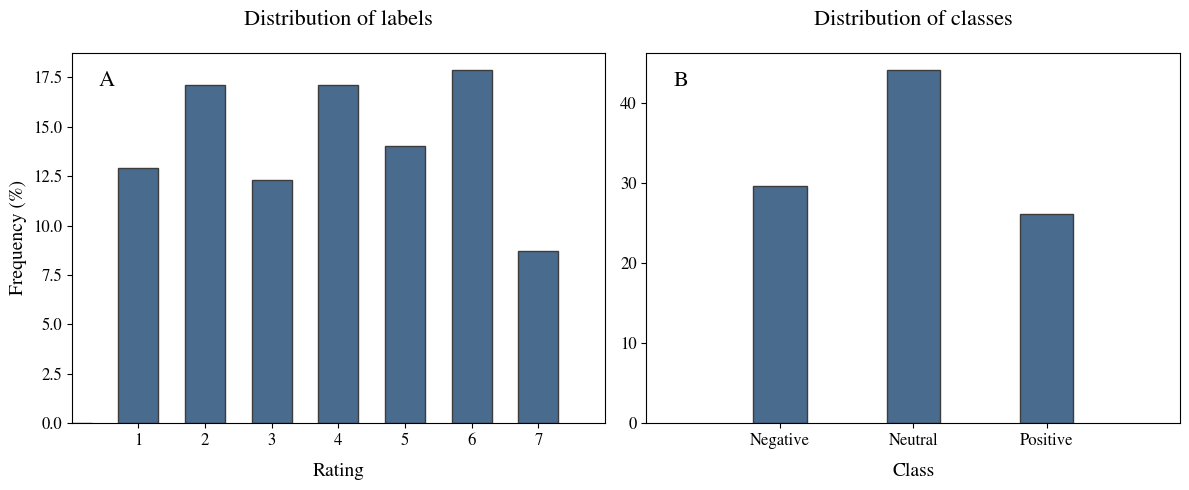

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for label distribution of rating
data_rating = list(survey["LABEL.VALUE"])
binss_rating = np.arange(9)

# Create a histogram using numpy
hist_rating, bins_rating = np.histogram(data_rating, bins=binss_rating)

count_rating = len(data_rating)
percentages_rating = (hist_rating / count_rating) * 100

# Plot the histogram with percentages
axs[0].bar(bins_rating[:-1], percentages_rating, width=0.6, color='#486B8E', edgecolor='#3D3D3D')

axs[0].set_xlabel("Rating", labelpad = 10)
axs[0].set_ylabel("Frequency (%)")
axs[0].set_title("Distribution of labels")
axs[0].set_xticks(np.arange(1, 8, 1))
axs[0].set_xlim(0, 8)

# Add annotation 'A' in the upper left corner of the first subplot
axs[0].text(0.05, 0.95, 'A', transform=axs[0].transAxes, fontsize=16, va='top', ha='left')

# Plot for label distribution of classes
data_classes = list(features["class"])
binss_classes = np.arange(4)

# Create a histogram using numpy
hist_classes, bins_classes = np.histogram(data_classes, bins=binss_classes)

# Calculate percentages
total_count_classes = len(data_classes)
percentages_classes = (hist_classes / total_count_classes) * 100

# Plot the histogram with percentages
axs[1].bar(bins_classes[:-1], percentages_classes, width=0.4, color='#486B8E', edgecolor='#3D3D3D')

axs[1].set_xlabel("Class", labelpad=10)
axs[1].set_title("Distribution of classes")
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axs[1].set_xlim(-1, 3)

# Add annotation 'B' in the upper left corner of the second subplot
axs[1].text(0.05, 0.95, 'B', transform=axs[1].transAxes, fontsize=16, va='top', ha='left')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("label_distribution_subplots.pdf", format='pdf', bbox_inches="tight")

# Display the plot
plt.show()



In [2]:
44.84 - 33.33

11.510000000000005

Distributie test set
0 = 25.91%, 1 = 46.84%, 2 = 27.24%

# 2e plot is labeldistributie van y_test

Die is hetzelfde voor alle modellen omdat we een random seed gebruiken

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

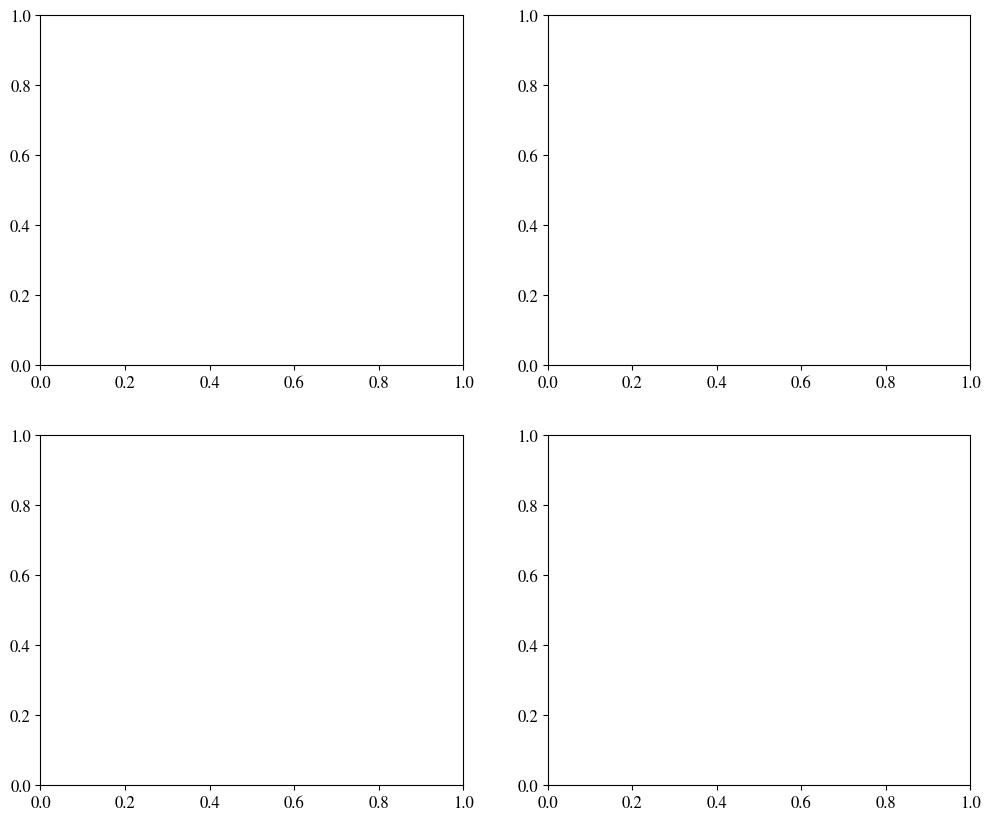

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for label distribution of rating
data_rating = list(survey["LABEL.VALUE"])
binss_rating = np.arange(9)

# Create a histogram using numpy
hist_rating, bins_rating = np.histogram(data_rating, bins=binss_rating)

count_rating = len(data_rating)
percentages_rating = (hist_rating / count_rating) * 100

# Plot the histogram with percentages
axs[0, :].bar(bins_rating[:-1], percentages_rating, width=0.6, color='#486B8E', edgecolor='#3D3D3D')

axs[0, :].set_xlabel("Rating", labelpad = 10)
axs[0, :].set_ylabel("Frequency (%)")
axs[0, :].set_title("Distribution of labels - all data")
axs[0, :].set_xticks(np.arange(1, 8, 1))
axs[0, :].set_xlim(0, 8)

# Add annotation 'A' in the upper left corner of the first subplot
axs[0, 0].text(0.05, 0.95, 'A', transform=axs[0, 0].transAxes, fontsize=16, va='top', ha='left')

# Plot for label distribution of classes - all data
data_classes1 = list(features["class"])
binss_classes1 = np.arange(4)

# Create a histogram using numpy
hist_classes1, bins_classes1 = np.histogram(data_classes1, bins=binss_classes1)

# Calculate percentages
total_count_classes1 = len(data_classes1)
percentages_classes1 = (hist_classes1 / total_count_classes1) * 100

# Plot the histogram with percentages
axs[1, 0].bar(bins_classes1[:-1], percentages_classes1, width=0.4, color='#486B8E', edgecolor='#3D3D3D')

axs[1, 0].set_xlabel("Class", labelpad=10)
axs[1, 0].set_title("Distribution of classes - all data")
axs[1, 0].set_xticks([0, 1, 2])
axs[1, 0].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axs[1, 0].set_xlim(-1, 3)

# Add annotation 'B' in the upper left corner of the second subplot
axs[1, 0].text(0.05, 0.95, 'B', transform=axs[1, 0].transAxes, fontsize=16, va='top', ha='left')

# Plot for label distribution of classes - test set
data_classes = y_test
binss_classes = np.arange(4)

# Create a histogram using numpy
hist_classes, bins_classes = np.histogram(data_classes, bins=binss_classes)

# Calculate percentages
total_count_classes = len(data_classes)
percentages_classes = (hist_classes / total_count_classes) * 100

# Plot the histogram with percentages
axs[1, 1].bar(bins_classes[:-1], percentages_classes, width=0.4, color='#486B8E', edgecolor='#3D3D3D')

axs[1, 1].set_xlabel("Class", labelpad=10)
axs[1, 1].set_title("Distribution of classes - test set")
axs[1, 1].set_xticks([0, 1, 2])
axs[1, 1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axs[1, 1].set_xlim(-1, 3)

# Add annotation 'C' in the upper left corner of the third subplot
axs[1, 1].text(0.05, 0.95, 'C', transform=axs[1, 1].transAxes, fontsize=16, va='top', ha='left')

# Hide the empty subplot
axs[0, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("label_distribution_subplots_y_test.pdf", format='pdf', bbox_inches="tight")

# Display the plot
plt.show()



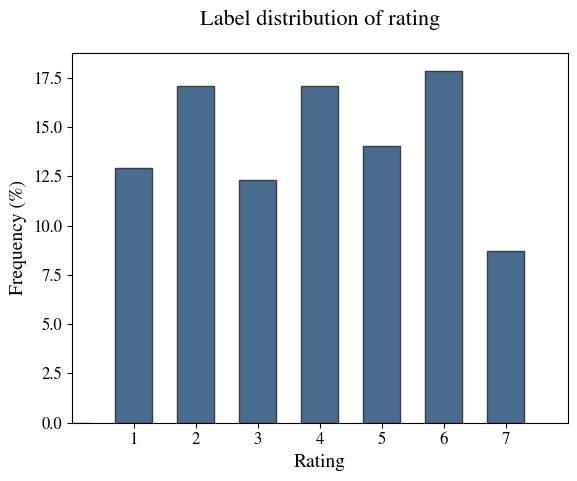

In [33]:
plt.figure()

# Replace this with your actual list of values
data = list(survey["LABEL.VALUE"])
binss = np.arange(9)  # Adjust bins for integer x-axis ticks and space

# Create a histogram using numpy
hist, bins = np.histogram(data, bins=binss)

count = len(data)
percentages = (hist / count) * 100

# Plot the adjusted histogram with darker outline
plt.bar(bins[:-1], percentages, width=0.6, color='#486B8E', edgecolor='#3D3D3D')  # Increase width and adjust edge color

plt.xlabel("Rating")
plt.ylabel("Frequency (%)")
plt.title("Label distribution of rating")


# Adjust x-axis ticks to show each integer
plt.xticks(np.arange(1, 8, 1))  # Adjust ticks to show each integer

# Add a bit of space between the edges of the figure and the first and last bin
plt.xlim(0, 8)  # Adjust x-axis limits for space

plt.savefig("label_distribution_rating.pdf", format='pdf', bbox_inches = "tight")
# Display the plot
plt.show()

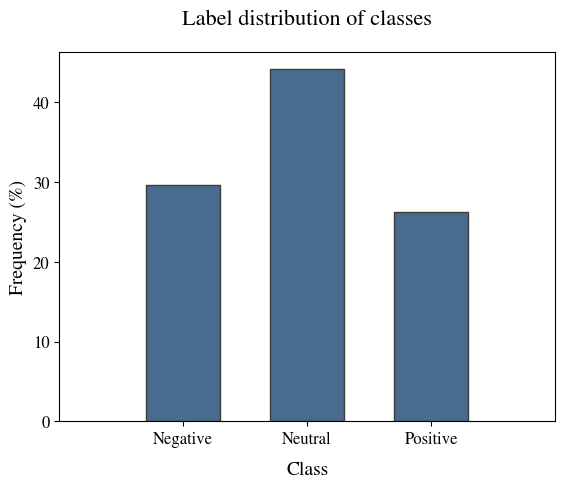

In [34]:
data = list(features["class"])
binss = np.arange(4)

# Create a histogram using numpy
hist, bins = np.histogram(data, bins=binss)

# Calculate percentages
total_count = len(data)
percentages = (hist / total_count) * 100

# Plot the histogram with percentages
plt.bar(bins[:-1], percentages, width=0.6, color='#486B8E', edgecolor='#3D3D3D')  

plt.xlabel("Class", labelpad=10)
plt.ylabel("Frequency (%)")
plt.title("Label distribution of classes")

plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])

# Add a bit of space between the edges of the figure and the first and last bin
plt.xlim(-1, 3)

# Display the plot
plt.savefig("label_distribution_classes.pdf", format='pdf', bbox_inches="tight")
plt.show()


## Classes count
0 = 890 (29.66%), 1 = 1325 (44.15%), 2 = 786 (25.59%)